# <span style="color: yellow; font-size: 30px; font-weight: bold;">redaing the data</span>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
article = pd.read_csv(r'E:\ARAS\customer churn\codes\articles.csv')
df = pd.read_csv(r'E:\ARAS\customer churn\codes\Aras_transactions.csv')
df = pd.merge(df, article, on='articles_id', how='inner')
df

,factor_id,customers_id,price_purchase,art_name,price_item,BranchCode,date,d_dat,articles_id,group_id
0,5,9120623592,220000.0,مگا برگر,83500.0,13813.0,1400-12-21,2022-03-12,1000.0,0
1,5,9120623592,220000.0,پيتزا چهار فصل,103500.0,13813.0,1400-12-21,2022-03-12,1001.0,1
2,50,9397257065,158500.0,پيتزا پپروني,88500.0,13813.0,1400-12-23,2022-03-14,1002.0,1
3,50,9397257065,158500.0,سيب زميني مخصوص,42500.0,13813.0,1400-12-23,2022-03-14,1003.0,2
4,50,9397257065,158500.0,زيرو قوطي,17400.0,13813.0,1400-12-23,2022-03-14,1004.0,3
...,...,...,...,...,...,...,...,...,...,...
3955556,2317955,91309600180,796500.0,سيب زميني مخصوص,177000.0,13812.0,1402-09-29,2023-12-20,1003.0,2
3955557,2317956,93362669140,215000.0,فيله استريپس 4 تيکه,178500.0,13810.0,1401-12-27,2023-03-18,1018.0,9
3955558,2317956,91289353360,443000.0,پيتزا دابل,274500.0,13812.0,1402-09-29,2023-12-20,1029.0,1
3955559,2317956,91289353360,443000.0,سيب زميني مخصوص,88500.0,13812.0,1402-09-29,2023-12-20,1003.0,2


In [4]:
df = df[['customers_id', 'price_purchase', 'd_dat', 'group_id']]
df['date'] = pd.to_datetime(df['d_dat'])
df = df.drop('d_dat', axis = 1)
df

,customers_id,price_purchase,group_id,date
0,9120623592,220000.0,0,2022-03-12
1,9120623592,220000.0,1,2022-03-12
2,9397257065,158500.0,1,2022-03-14
3,9397257065,158500.0,2,2022-03-14
4,9397257065,158500.0,3,2022-03-14
...,...,...,...,...
3955556,91309600180,796500.0,2,2023-12-20
3955557,93362669140,215000.0,9,2023-03-18
3955558,91289353360,443000.0,1,2023-12-20
3955559,91289353360,443000.0,2,2023-12-20


In [5]:
df['customers_id'] = df['customers_id'].astype(str)
# Filter rows where 'customer_id' starts with '9' and the length is between 8 and 13
df = df[df['customers_id'].str.startswith('9') & df['customers_id'].str.len().between(8, 13)]

df['group_id'] = df['group_id'].astype(str)
df['customers_id'] = df['customers_id'].astype(str)

In [6]:
df = df.drop_duplicates(subset=['customers_id', 'date'], keep='first')
customers_to_drop = df['customers_id'].value_counts()[df['customers_id'].value_counts() <= 2].index
df.drop(df[df['customers_id'].isin(customers_to_drop)].index, inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df

,customers_id,price_purchase,group_id,date
0,9121025890,949500.0,0,2022-03-15
1,9363027330,362000.0,2,2022-03-26
2,9127124492,204000.0,1,2022-03-27
3,9123009569,357000.0,2,2022-03-27
4,9123006834,452500.0,3,2022-03-28
...,...,...,...,...
735461,91223200070,523000.0,3,2023-12-20
735462,91213657900,305500.0,19,2023-03-18
735463,91294958440,258000.0,2,2023-03-18
735464,91218168230,533000.0,7,2023-12-20


Making the dataset

In [9]:
# Initialize the first cutoff dates
start_cutoff_date_0 = pd.Timestamp('2021-01-01')
break_cutoff_date_0 = pd.Timestamp('2021-06-01')

# Create lists to store the dates
start_cutoff_dates = [start_cutoff_date_0]
break_cutoff_dates = [break_cutoff_date_0]

# pd.Timedelta(days=180)

# Calculate the next dates
for i in range(4):
    next_start_date = start_cutoff_dates[i] + pd.DateOffset(months=6)
    next_break_date = break_cutoff_dates[i] + pd.DateOffset(months=6)
    start_cutoff_dates.append(next_start_date)
    break_cutoff_dates.append(next_break_date)
    print(f"start day {i+1} = {start_cutoff_dates[i+1]} \nend day {i+1} = {break_cutoff_dates[i+1]}")


start day 1 = 2021-07-01 00:00:00 
end day 1 = 2021-12-01 00:00:00
start day 2 = 2022-01-01 00:00:00 
end day 2 = 2022-06-01 00:00:00
start day 3 = 2022-07-01 00:00:00 
end day 3 = 2022-12-01 00:00:00
start day 4 = 2023-01-01 00:00:00 
end day 4 = 2023-06-01 00:00:00


In [10]:
# Initialize six different DataFrames
num_df = 5
df0, df1, df2, df3, df4 = [pd.DataFrame()] * num_df 

# Filter the DataFrame based on start and break cutoff dates
for i in range(len(break_cutoff_dates)):
    globals()[f"df{i}"] = df[(df['date'] >= start_cutoff_dates[i]) & (df['date'] <= break_cutoff_dates[i])]


In [11]:
df0 = df0.drop_duplicates(subset=['customers_id', 'date'], keep='first')
df1 = df1.drop_duplicates(subset=['customers_id', 'date'], keep='first')
df2 = df2.drop_duplicates(subset=['customers_id', 'date'], keep='first')
df3 = df3.drop_duplicates(subset=['customers_id', 'date'], keep='first')
df4 = df4.drop_duplicates(subset=['customers_id', 'date'], keep='first')

In [12]:
customers_to_drop_0 = df0['customers_id'].value_counts()[df0['customers_id'].value_counts() <= 2].index
df0.drop(df0[df0['customers_id'].isin(customers_to_drop_0)].index, inplace=True)

customers_to_drop_1 = df1['customers_id'].value_counts()[df1['customers_id'].value_counts() <= 2].index
df1.drop(df1[df1['customers_id'].isin(customers_to_drop_1)].index, inplace=True)

customers_to_drop_2 = df2['customers_id'].value_counts()[df2['customers_id'].value_counts() <= 2].index
df2.drop(df2[df2['customers_id'].isin(customers_to_drop_2)].index, inplace=True)

customers_to_drop_3 = df3['customers_id'].value_counts()[df3['customers_id'].value_counts() <= 2].index
df3.drop(df3[df3['customers_id'].isin(customers_to_drop_3)].index, inplace=True)

customers_to_drop_4 = df4['customers_id'].value_counts()[df4['customers_id'].value_counts() <= 2].index
df4.drop(df4[df4['customers_id'].isin(customers_to_drop_4)].index, inplace=True)

In [13]:
df0.shape, df1.shape, df2.shape, df3.shape, df4.shape

((27691, 4), (40527, 4), (45223, 4), (39151, 4), (41264, 4))

In [14]:
df0['customers_id'].nunique()

6673

In [15]:
df0

,customers_id,price_purchase,group_id,date
603,9022770515,92000.0,3,2021-01-21
659,9395216221,98500.0,14,2021-01-01
663,9125409754,99500.0,9,2021-01-01
664,9022504905,65000.0,0,2021-01-01
666,9128300957,149500.0,5,2021-01-01
...,...,...,...,...
619917,91218603610,121000.0,1,2021-06-01
619918,93004949420,73500.0,0,2021-06-01
619926,91292479900,119000.0,1,2021-06-01
619934,90308801810,134000.0,10,2021-06-01


In [53]:
import lifetimes

# # Function to calculate metrics
# def calculate_metrics(df, current_date):
#     metrics_pd = (
#         lifetimes.utils.summary_data_from_transaction_data(
#             df,
#             customer_id_col='customers_id',
#             datetime_col='date',
#             observation_period_end=current_date, 
#             freq='D'
#         )
#     )
#     filtered_pd = metrics_pd[metrics_pd['frequency'] > 0]
#     return filtered_pd
# Function to calculate metrics
def calculate_metrics(df, current_date):
    metrics_pd = (
        lifetimes.utils.summary_data_from_transaction_data(
            df,
            customer_id_col='customers_id',
            datetime_col='date',
            observation_period_end=current_date, 
            freq='D'
        )
    )
    filtered_pd = metrics_pd[metrics_pd['frequency'] > 0]
    filtered_pd.reset_index(inplace=True)  # Ensure customers_id is a column
    return filtered_pd


# Main part of the script
# Assuming df is your main DataFrame


# Define different current_date values
current_dates = [df0['date'].max(), df1['date'].max(), df2['date'].max(), df3['date'].max(), df4['date'].max()]

# Calculate metrics for each subset with different current_date values
metrics_0 = calculate_metrics(df0, current_dates[0])
metrics_1 = calculate_metrics(df1, current_dates[1])
metrics_2 = calculate_metrics(df2, current_dates[2])
metrics_3 = calculate_metrics(df3, current_dates[3])
metrics_4 = calculate_metrics(df4, current_dates[4])

In [54]:
metrics_0

,customers_id,frequency,recency,T
0,90106052590,3.0,100.0,142.0
1,90106904800,2.0,44.0,115.0
2,9010833038,2.0,36.0,147.0
3,90108330380,2.0,65.0,80.0
4,9011015565,2.0,27.0,40.0
...,...,...,...,...
6668,9928580948,3.0,112.0,124.0
6669,99292175460,3.0,71.0,113.0
6670,99406163610,3.0,38.0,39.0
6671,9981022883,2.0,19.0,141.0


probability of being alive 

In [41]:
from lifetimes import BetaGeoFitter


def predict_alive_probabilities(metrics_pd, t, penalizer_coef=0.01):
    bgf = BetaGeoFitter(penalizer_coef=penalizer_coef)
    bgf.fit(metrics_pd['frequency'], metrics_pd['recency'], metrics_pd['T'])
    
    # Predict future transactions for the next 30 days
    metrics_pd['predicted_purchases'] = bgf.predict(t, metrics_pd['frequency'], metrics_pd['recency'], metrics_pd['T'])
    
    # Calculate the probability of being alive in the next 30 days
    metrics_pd['prob_alive_30'] = bgf.conditional_probability_alive(
        metrics_pd['frequency'], 
        metrics_pd['recency'], 
        metrics_pd['T'] + t  # We add t to T to predict for the next t days
    )
    return metrics_pd

# Set t to 30 days
t = 30

# Fit BG/NBD model and predict probabilities with a penalizer
metrics_0 = predict_alive_probabilities(metrics_0, t, penalizer_coef=0.1)
metrics_1 = predict_alive_probabilities(metrics_1, t, penalizer_coef=0.1)
metrics_2 = predict_alive_probabilities(metrics_2, t, penalizer_coef=0.1)
metrics_3 = predict_alive_probabilities(metrics_3, t, penalizer_coef=0.1)
metrics_4 = predict_alive_probabilities(metrics_4, t, penalizer_coef=0.1)


In [43]:
metrics_2

,customers_id,frequency,recency,T,predicted_purchases,prob_alive_30,expected_purchases_30
0,9010143245,2.0,94.0,101.0,0.691759,1.0,0.691759
1,90102415100,3.0,72.0,146.0,0.685638,1.0,0.685638
2,9010269562,3.0,77.0,94.0,0.954793,1.0,0.954793
3,90103177300,2.0,58.0,82.0,0.800866,1.0,0.800866
4,9010833038,3.0,109.0,145.0,0.689375,1.0,0.689375
...,...,...,...,...,...,...,...
10507,99811688880,2.0,89.0,93.0,0.733855,1.0,0.733855
10508,9981277474,2.0,66.0,139.0,0.543633,1.0,0.543633
10509,9991107870,3.0,16.0,27.0,1.932007,1.0,1.932007
10510,9991109504,2.0,62.0,147.0,0.520183,1.0,0.520183


In [27]:
print(set(metrics_0['prob_alive_30']))

{0.9999999999999989, 0.9999999999999953, 0.9999999999999982, 0.999999999999998, 0.9999999999999889, 0.9999999999999987, 0.9999999999999996, 0.9999999999999736, 0.9999999999999993, 0.9999999999999998, 0.9999999999999787, 0.9999999999999931, 0.9999999999999718, 0.999999999999986, 0.9999999999999576, 0.9999999999999789, 0.9999999999999505, 0.9999999999998297, 0.9999999999998936, 0.9999999999988065, 0.9999999999999933, 0.9999999999999862, 0.9999999999999791, 0.999999999999972, 0.9999999999999649, 0.9999999999999578, 0.9999999999999436, 0.9999999999999722, 0.9999999999999793, 0.9999999999999936, 0.9999999999999865, 0.9999999999999367, 0.9999999999999438, 0.999999999999958, 0.9999999999998728, 0.9999999999999651, 0.9999999999999509, 0.9999999999999938, 0.999999999999944, 0.9999999999999867, 0.9999999999999796, 0.9999999999999298, 0.9999999999999725, 0.9999999999999583, 0.9999999999992264, 0.9999999999999512, 0.9999999999999798, 0.999999999999994, 0.9999999999999869, 0.9999999999997808, 0.999

expected number of purchase in the next 30 days

In [55]:
# Function to fit BG/NBD model and predict expected number of purchases in the next 30 days
def predict_expected_purchases(metrics_pd, t=30, penalizer_coef=0.01):
    bgf = BetaGeoFitter(penalizer_coef=penalizer_coef)
    bgf.fit(metrics_pd['frequency'], metrics_pd['recency'], metrics_pd['T'])
    
    # Predict the expected number of purchases for the next t days
    metrics_pd['expected_purchases_30'] = bgf.predict(t, metrics_pd['frequency'], metrics_pd['recency'], metrics_pd['T'])
    return metrics_pd


# Fit BG/NBD model and predict expected number of purchases in the next 30 days
metrics_0 = predict_expected_purchases(metrics_0, t=30, penalizer_coef=0.1)
metrics_1 = predict_expected_purchases(metrics_1, t=30, penalizer_coef=0.1)
metrics_2 = predict_expected_purchases(metrics_2, t=30, penalizer_coef=0.1)
metrics_3 = predict_expected_purchases(metrics_3, t=30, penalizer_coef=0.1)
metrics_4 = predict_expected_purchases(metrics_4, t=30, penalizer_coef=0.1)

In [56]:
metrics_0

,customers_id,frequency,recency,T,expected_purchases_30
0,90106052590,3.0,100.0,142.0,0.698728
1,90106904800,2.0,44.0,115.0,0.626390
2,9010833038,2.0,36.0,147.0,0.518578
3,90108330380,2.0,65.0,80.0,0.810746
4,9011015565,2.0,27.0,40.0,1.221664
...,...,...,...,...,...
6668,9928580948,3.0,112.0,124.0,0.775926
6669,99292175460,3.0,71.0,113.0,0.832108
6670,99406163610,3.0,38.0,39.0,1.622351
6671,9981022883,2.0,19.0,141.0,0.535872


In [32]:
print(set(metrics_0['expected_purchases_30']))

{0.8723010820019681, 1.4532206902863365, 2.321372171983583, 1.2232292744011204, 1.3471116904900953, 0.8891192907871392, 0.5076560037224844, 7.615896158753742, 0.6183554453782456, 0.7308515243632066, 2.0648991190815913, 2.205681719513283, 3.6470466140912094, 1.2270518799218735, 0.6607316542029695, 0.5608073846683157, 1.4493479137151655, 0.7105100144120268, 0.5810872524605633, 0.8546097914028654, 0.7145260007486313, 0.6691401619591566, 0.9542083814802786, 0.8039851727995612, 0.5776060293078346, 0.5299803139382576, 0.9165737669178399, 0.7026119671553213, 1.1396840861579856, 1.1035624806583835, 0.8463297390583878, 0.6656168960565136, 0.5213823403437854, 0.9099759339584861, 0.5076560037224785, 0.638841587009908, 0.9314783681544596, 0.5242171659856623, 0.6691401619591644, 0.7226957270195074, 0.9719974540764527, 1.8638399687623435, 1.7927304030404816, 0.7093433068089735, 0.9459756809388137, 2.1207647157559126, 0.9369540857291219, 0.6474212238424804, 0.7478585622483485, 1.1947275845964447, 0.6

save the results 

In [48]:
# Save the results to CSV files
metrics_0[['customers_id', 'expected_purchases_30']].to_csv('metrics_0.csv', index=False)
metrics_1[['customers_id', 'expected_purchases_30']].to_csv('metrics_1.csv', index=False)
metrics_2[['customers_id', 'expected_purchases_30']].to_csv('metrics_2.csv', index=False)
metrics_3[['customers_id', 'expected_purchases_30']].to_csv('metrics_3.csv', index=False)
metrics_4[['customers_id', 'expected_purchases_30']].to_csv('metrics_4.csv', index=False)

In [59]:
metrics_2['customers_id'].nunique(), df2['customers_id'].nunique()

(10512, 10512)

In [9]:
# # This is the end of the period or end of the observation in this code  
# end_date = df['date'].max()

# df = df[df['price_purchase'] > 0]

# summary = df.groupby('customers_id').agg(
#     frequency=('date', 'nunique'),  # Number of unique purchase dates
#     recency=('date', lambda x: (x.max() - x.min()).days),  # Days between first and last purchase
#     T=('date', lambda x: (end_date - x.min()).days),  # Days between first purchase and end of period
#     monetary_value=('price_purchase', 'mean')  # Average purchase value
# ).reset_index()

# # Subtract 1 from frequency as the definition suggests
# summary['frequency'] = summary['frequency'] - 1

# # Ensure there are no non-positive values
# summary = summary[(summary['monetary_value'] > 0) & (summary['frequency'] > 0)]

In [19]:
# import lifetimes

# # set the last transaction date as the end point for this historical dataset
# current_date = df['date'].max()

# # calculate the required customer metrics
# metrics_pd = (
#   lifetimes.utils.summary_data_from_transaction_data(
#     df,
#     customer_id_col='customers_id',
#     datetime_col='date',
#     observation_period_end = current_date, 
#     freq='D'
#     )
#   )

# filtered_pd = metrics_pd[metrics_pd['frequency'] > 0]

# # display first few rows
# metrics_pd

,frequency,recency,T
customers_id,,,
9001065686,4.0,232.0,366.0
90011138080,2.0,51.0,117.0
9001115968,4.0,140.0,158.0
9001250515,2.0,22.0,50.0
9001303355,5.0,116.0,224.0
...,...,...,...
9999916730,2.0,282.0,758.0
9999979115,13.0,1005.0,1355.0
99999791150,17.0,1064.0,1435.0


In [15]:
# metrics_pd.describe()

,frequency,recency,T
count,111195.000000,111195.000000,111195.000000
mean,5.607887,629.661433,1041.708458
std,6.286888,496.654436,560.881400
min,0.000000,0.000000,2.000000
25%,2.000000,243.000000,650.000000
50%,4.000000,520.000000,958.000000
75%,6.000000,888.000000,1344.000000
max,192.000000,3212.000000,3298.000000


In [18]:
# from lifetimes import BetaGeoFitter

# bgf = BetaGeoFitter(penalizer_coef=0.0)
# bgf.fit(summary['frequency'], summary['recency'], summary['T'])
# print(bgf)

<lifetimes.BetaGeoFitter: fitted with 111189 subjects, a: 3.25, alpha: 148.32, b: 29.88, r: 1.60>


<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

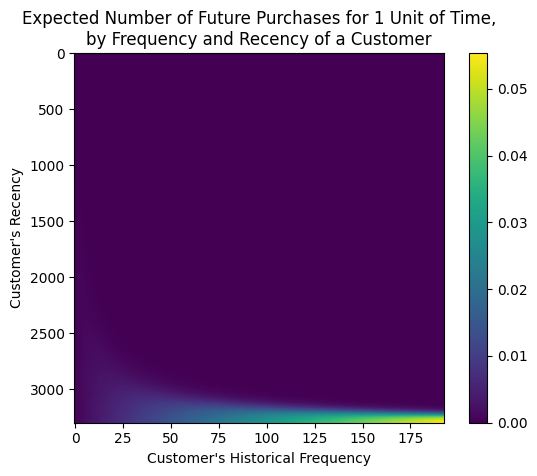

In [33]:
# from lifetimes.plotting import plot_frequency_recency_matrix

# plot_frequency_recency_matrix(bgf)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

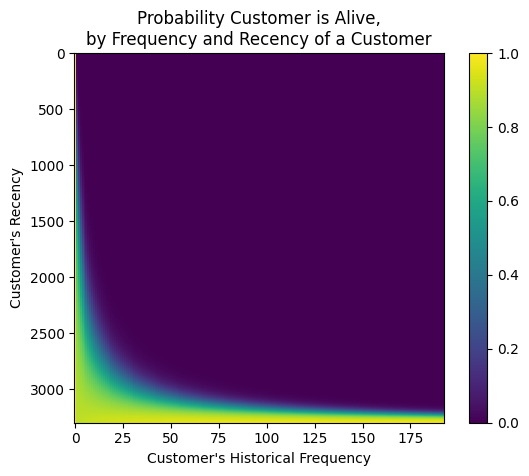

In [34]:
# from lifetimes.plotting import plot_probability_alive_matrix

# plot_probability_alive_matrix(bgf)

In [12]:
# t = 30  # This is for the next 30 days for BG/NBD model
# summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T'])
# summary.sort_values(by='predicted_purchases').tail(5)

,customers_id,frequency,recency,T,monetary_value,predicted_purchases
39249,9123005835,120,741,745,255613.636364,3.769671
89295,9199538323,65,301,306,298382.575758,3.816272
46219,9123594970,82,419,422,286445.783133,3.955421
81711,9131136296,186,917,918,192270.481283,4.987146
17565,9121130775,92,178,178,197666.666667,7.518483


check if it's eligible to use the model (Yes if there is no relations between M and F)

In [13]:
# summary[['monetary_value', 'frequency']].corr() # So it is ok to use it

,monetary_value,frequency
monetary_value,1.000000,-0.019382
frequency,-0.019382,1.000000


fit the model (Gamma-Gamma model)

In [31]:
# from lifetimes import GammaGammaFitter

# ggf = GammaGammaFitter(penalizer_coef = 1)
# ggf.fit(summary['frequency'],
#         summary['monetary_value'])
# print(ggf)

<lifetimes.GammaGammaFitter: fitted with 111189 subjects, p: 0.24, q: 0.06, v: 0.18>
